<a href="https://colab.research.google.com/github/socd06/databricks-language-hackathon/blob/main/Transformers_Agents_StarCoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install transformers accelerate diffusers
!pip -q install datasets sentencepiece
!pip -q install huggingface_hub>=0.14.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip show transformers

Name: transformers
Version: 4.29.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, tokenizers, tqdm
Required-by: 


In [3]:
from huggingface_hub import notebook_login
notebook_login()

In [4]:
import IPython
import soundfile as sf

def play_audio(audio):
    sf.write("speech_converted.wav", audio.numpy(), samplerate=16000)
    return IPython.display.Audio("speech_converted.wav")


In [33]:
#ini the agent
from transformers.tools import HfAgent
coder = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder")
print("StarCoder is initialized 💪 as coder")




StarCoder is initialized 💪 as coder


In [43]:
from transformers.tools import HfAgent
agent = HfAgent(url_endpoint="https://api-inference.huggingface.co/models/OpenAssistant/oasst-sft-4-pythia-12b-epoch-3.5")
print("OpenAssistant is initialized 💪")


OpenAssistant is initialized 💪


In [69]:
import os

In [47]:
coder.run("Write a function that takes a directory with .doc, .rtf or .docx files and returns a text corpus that doesn't exceed your token input limits", return_code=True)

==Explanation from the agent==
I will use the following  tool: `text_downloader` to download the files.


==Code generated by the agent==
def text_corpus_from_directory(directory):
    corpus = ""
    for file in os.listdir(directory):
        if file.endswith(".doc") or file.endswith(".rtf") or file.endswith(".docx"):
            corpus += text_downloader(url=f"https://raw.githubusercontent.com/techthiyanes/annotated_deep_learning_paper_implementations/main/papers/{file}")
    return corpus


'from transformers import load_tool\n\ntext_downloader = load_tool("huggingface-tools/text-download")\n\ndef text_corpus_from_directory(directory):\n    corpus = ""\n    for file in os.listdir(directory):\n        if file.endswith(".doc") or file.endswith(".rtf") or file.endswith(".docx"):\n            corpus += text_downloader(url=f"https://raw.githubusercontent.com/techthiyanes/annotated_deep_learning_paper_implementations/main/papers/{file}")\n    return corpus'

In [52]:
coder.run("Write a function that takes a directory with .doc, .rtf or .docx files and returns a text corpus that doesn't exceed your token input limits")

==Explanation from the agent==
I will use the following  tool: `text_downloader` to download the files.


==Code generated by the agent==
def text_corpus_from_directory(directory):
    corpus = ""
    for file in os.listdir(directory):
        if file.endswith(".doc") or file.endswith(".rtf") or file.endswith(".docx"):
            corpus += text_downloader(url=f"https://raw.githubusercontent.com/techthiyanes/annotated_deep_learning_paper_implementations/main/papers/{file}")
    return corpus


==Result==
Evaluation of the code stopped at line 0 before the end because of the following error:
FunctionDef is not supported.


In [51]:
coder.chat("What is the maximum number of tokens you can take as an input?", return_code=True)

==Explanation from the agent==
512


In [56]:
coder.run(f"define a function with two inputs: a directory and token_size integer, I will upload documents to the directory and they will contain .doc, .rtf or .docx files and it will make a text corpus out of them. Summarize the text to match token_size token size, returns the summarized text corpus", return_code=True)

==Explanation from the agent==
I will use the following  tools: `text_downloader` to download the documents, `summarizer` to summarize the text, `text_reader` to read the summary out loud.


==Code generated by the agent==
def summarize_corpus(directory, token_size):
    corpus = ""
    for file in os.listdir(directory):
        if file.endswith(".doc") or file.endswith(".docx") or file.endswith(".rtf"):
            text = text_downloader(url=f"https://raw.githubusercontent.com/huggingface/datasets/master/datasets/doc2dial/doc2dial_doc/{file}")
            corpus += text
    summarized_corpus = summarizer(text=corpus, token_size=token_size)
    audio_summary = text_reader(summarized_corpus)
    return summarized_corpus


'from transformers import load_tool\n\nsummarizer = load_tool("summarization")\ntext_reader = load_tool("text-to-speech")\ntext_downloader = load_tool("huggingface-tools/text-download")\n\ndef summarize_corpus(directory, token_size):\n    corpus = ""\n    for file in os.listdir(directory):\n        if file.endswith(".doc") or file.endswith(".docx") or file.endswith(".rtf"):\n            text = text_downloader(url=f"https://raw.githubusercontent.com/huggingface/datasets/master/datasets/doc2dial/doc2dial_doc/{file}")\n            corpus += text\n    summarized_corpus = summarizer(text=corpus, token_size=token_size)\n    audio_summary = text_reader(summarized_corpus)\n    return summarized_corpus'

In [23]:
text = """CALIBRATION INTERVALS:
	Equipment							Interval
	Master Gage Block Set					Two Years
	Thread plug and ring gages					Six Months
	Micrometer							One Week
	Caliper 							One Year
	Surface Plate							Three Years
	Volt/Ohm Meter						One Year
	Hole Plug Gage						After Each Use
  """

In [72]:
help(load_tool)

Help on function load_tool in module transformers.tools.base:

load_tool(task_or_repo_id, model_repo_id=None, remote=False, token=None, **kwargs)
    Main function to quickly load a tool, be it on the Hub or in the Transformers library.
    
    Args:
        task_or_repo_id (`str`):
            The task for which to load the tool or a repo ID of a tool on the Hub. Tasks implemented in Transformers
            are:
    
            - `"document-question-answering"`
            - `"image-captioning"`
            - `"image-question-answering"`
            - `"image-segmentation"`
            - `"speech-to-text"`
            - `"summarization"`
            - `"text-classification"`
            - `"text-question-answering"`
            - `"text-to-speech"`
            - `"translation"`
    
        model_repo_id (`str`, *optional*):
            Use this argument to use a different model than the default one for the tool you selected.
        remote (`bool`, *optional*, defaults to `False`)

In [76]:
coder.run('define a function that parses multiple word documents into a text variable')

==Explanation from the agent==
I will use the following  tool: `text_downloader` to download the document.


==Code generated by the agent==
def parse_document(url):
    text = text_downloader(url)
    return text


==Result==
Evaluation of the code stopped at line 0 before the end because of the following error:
FunctionDef is not supported.


In [73]:
summarizer = load_tool('summarization')

def summarize_corpus(directory, token_size):
    corpus = ""
    for file in os.listdir(directory):
        if file.endswith(".doc") or file.endswith(".docx") or file.endswith(".rtf"):
            text = text_downloader(url=f"https://raw.githubusercontent.com/huggingface/datasets/master/datasets/doc2dial/doc2dial_doc/{file}")
            corpus += text
    summarized_corpus = summarizer(text=corpus, token_size=token_size)
    return summarized_corpus

In [74]:
corpus = summarize_corpus('/content/docs',512)
corpus

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│ in summarize_corpus:7                                                                            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'text_downloader' is not defined

In [28]:
question = 'what is the calibration interval for a caliper?'
agent.chat(f'Given this text: {text}, answer this question: {question}',return_code=True)

==Explanation from the agent==
I will use the tool `text_qa` to answer the question.


==Code generated by the agent==
answer = text_qa(text, question="What is the calibration interval for a caliper?")
print(f"The answer is {answer}.")


'from transformers import load_tool\n\ntext_qa = load_tool("text-question-answering")\n\nanswer = text_qa(text, question="What is the calibration interval for a caliper?")\nprint(f"The answer is {answer}.")'

In [29]:
# THIS WAS USING STARCODER
from transformers import load_tool

text_qa = load_tool("text-question-answering")

answer = text_qa(text, question="What is the calibration interval for a caliper?")
print(f"The answer is {answer}.")
# Answer is correct

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


The answer is One Year.


In [31]:
# THIS WAS USING OpenAssistant
from transformers import load_tool

text_qa = load_tool("text-question-answering")

answer = text_qa(text, question="What is the calibration interval for a caliper?")
print(f"The answer is {answer}.")
# Answer is correct

The answer is One Year.


### Chat mode

The difference between the two is relative to their memory:
- `.run` does not keep memory across runs, but performs better for multiple operations at once (such as running two, or three tools in a row from a given instruction)
- `.chat` keeps memory across runs, but performs better at single instructions.


==Explanation from the agent==
I will use the tool `image_generator` to generate an image of a ginger mainecoon cat.


==Code generated by the agent==
image = image_generator(prompt="ginger mainecoon cat")


==Result==


  0%|          | 0/25 [00:00<?, ?it/s]

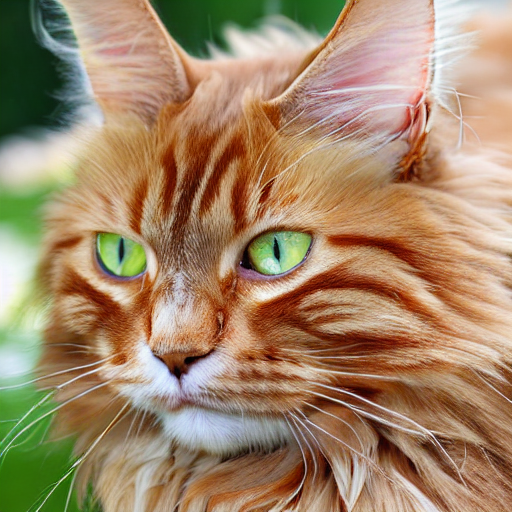

In [ ]:
agent.chat("Show me an an image of a ginger mainecoon cat")

==Explanation from the agent==
I will use the tool `image_transformer` to transform the image so that the background is in the snow.


==Code generated by the agent==
transformed_image = image_transformer(image, prompt="snow")


==Result==


A new version of the following files was downloaded from https://huggingface.co/space/huggingface-tools/image-transformation:
- image_transformation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

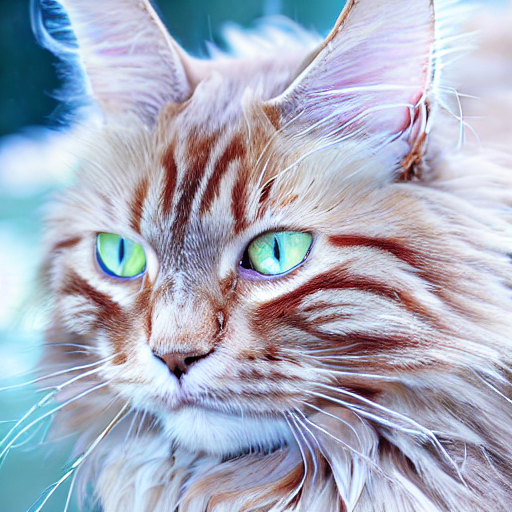

In [ ]:
agent.chat("Transform the image so that the background is in the snow")

In [ ]:
agent.prepare_for_new_chat()

## Tools

So far we've been using the tools that the agent has access to. These tools are the following:

- **Document question answering**: given a document (such as a PDF) in image format, answer a question on this document (Donut)
- **Text question answering**: given a long text and a question, answer the question in the text (Flan-T5)
- **Unconditional image captioning**: Caption the image! (BLIP)
- **Image question answering**: given an image, answer a question on this image (VILT)
- **Image segmentation**: given an image and a prompt, output the segmentation mask of that prompt (CLIPSeg)
- **Speech to text**: given an audio recording of a person talking, transcribe the speech into text (Whisper)
- **Text to speech**: convert text to speech (SpeechT5)
- **Zero-shot text classification**: given a text and a list of labels, identify to which label the text corresponds the most (BART)
- **Text summarization**: summarize a long text in one or a few sentences (BART)
- **Translation**: translate the text into a given language (NLLB)

We also support the following community-based tools:

- **Text downloader**: to download a text from a web URL
- **Text to image**: generate an image according to a prompt, leveraging stable diffusion
- **Image transformation**: transforms an image

We can therefore use a mix and match of different tools by explaining in natural language what we would like to do.



In [ ]:
agent.chat("who is the possible new twitter ceo based on this article at https://techcrunch.com/2023/05/11/elon-musk-says-he-has-found-a-new-ceo-for-twitter/") 

==Explanation from the agent==
I will use the tool `text_downloader` to download the text from the URL, then the tool `text_qa` to answer the question.


==Code generated by the agent==
text = text_downloader(url="https://techcrunch.com/2023/05/11/elon-musk-says-he-has-found-a-new-ceo-for-twitter/")
answer = text_qa(text=text, question="Who is the possible new Twitter CEO?")
print(f"The answer is {answer}.")


==Result==


Token indices sequence length is longer than the specified maximum sequence length for this model (723 > 512). Running this sequence through the model will result in indexing errors
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


The answer is NBCUniversal Head of Advertising Linda Yaccarino.


'NBCUniversal Head of Advertising Linda Yaccarino'

In [ ]:
agent.chat("who was the former twitter ceo based on that article") 

==Explanation from the agent==
I will use the tool `text_qa` to answer the question.


==Code generated by the agent==
answer = text_qa(text=text, question="Who was the former Twitter CEO based on that article?")
print(f"The answer is {answer}.")


==Result==
The answer is Parag Agrawal.


'Parag Agrawal'

In [ ]:
agent.chat("who is the current twitter ceo based on that article") 

==Explanation from the agent==
I will use the tool `text_qa` to answer the question.


==Code generated by the agent==
answer = text_qa(text=text, question="Who is the current Twitter CEO based on that article?")
print(f"The answer is {answer}.")


==Result==
The answer is Parag Agrawal.


'Parag Agrawal'

In [ ]:
agent.chat("Translate the title of that article into French") 

==Explanation from the agent==
I will use the tool `translator` to translate the title of the article into French.


==Code generated by the agent==
translated_title = translator(text=title, src_lang="English", tgt_lang="French")
print(f"The translated title is {translated_title}.")


==Result==
Evaluation of the code stopped at line 0 before the end because of the following error. Copy paste the following error message and send it back to the agent:
I get an error: 'The variable `title` is not defined.'


In [ ]:
agent.chat("Summarize that article for me") 

==Explanation from the agent==
I will use the tool `summarizer` to create a summary of the article.


==Code generated by the agent==
summary = summarizer(text)
print(f"Summary: {summary}")


==Result==


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (142) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Summary: Elon Musk announced that he has found a new CEO for Twitter. The new CEO is expected to start in six weeks. Musk will transition from his role as CEO of the social network to serving as its executive chair and chief technology officer. Musk bought Twitter last October for $44 billion and laid off half of its staff in November.


'Elon Musk announced that he has found a new CEO for Twitter. The new CEO is expected to start in six weeks. Musk will transition from his role as CEO of the social network to serving as its executive chair and chief technology officer. Musk bought Twitter last October for $44 billion and laid off half of its staff in November.'

In [ ]:
agent.prepare_for_new_chat()

From HF Demo 


### Adding new tools 

We'll add a very simple tool so that the demo remains simple: we'll use the awesome cataas (Cat-As-A-Service) API to get random cats on each run.

We can get a random cat with the following code:

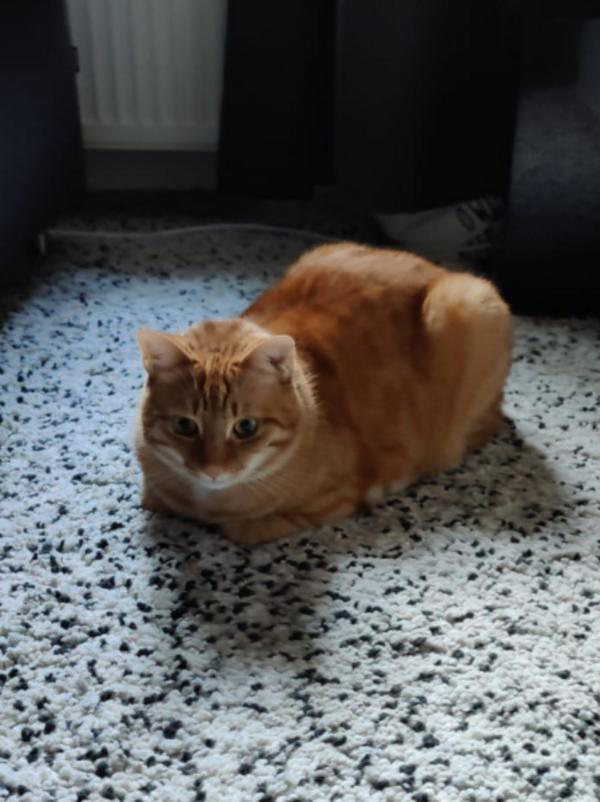

In [ ]:
import requests
from PIL import Image

image = Image.open(requests.get('https://cataas.com/cat', stream=True).raw)
image

Let's create a tool that can be used by our system!

All tools depend on the superclass Tool that holds the main attributes necessary. We'll create a class that inherits from it:

In [ ]:
from transformers import Tool

class CatImageFetcher(Tool):
    pass

This class has a few needs:

- An attribute name, which corresponds to the name of the tool itself. To be in tune with other tools which have a performative name, we'll name it text-download-counter.
- An attribute description, which will be used to populate the prompt of the agent.
- inputs and outputs attributes. Defining this will help the python interpreter make educated choices about types, and will allow for a gradio-demo to be spawned when we push our tool to the Hub. They're both a list of expected values, which can be text, image, or audio.
- A __call__ method which contains the inference code. This is the code we've played with above!

Here’s what our class looks like now:

In [ ]:
from transformers import Tool
from huggingface_hub import list_models


class CatImageFetcher(Tool):
    name = "cat_fetcher"
    description = ("This is a tool that fetches an actual image of a cat online. It takes no input, and returns the image of a cat.")

    inputs = []
    outputs = ["text"]

    def __call__(self):
        return Image.open(requests.get('https://cataas.com/cat', stream=True).raw).resize((256, 256))

We can simply use and test the tool directly:

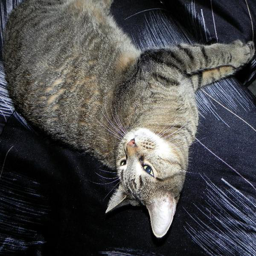

In [ ]:
tool = CatImageFetcher()
tool()

In order to pass the tool to the agent, we recommend instantiating the agent with the tools directly:

In [ ]:
from transformers.tools import HfAgent

agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder", additional_tools=[tool])

Let's try to have the agent use it with other tools!

In [ ]:
agent.run("Fetch an image of a cat online and caption it for me")

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'a cat curled on a blue pillow'